<a href="https://colab.research.google.com/github/Paodidom/Evento-25-marzo-SF-Club-Unipi/blob/main/4_MedieMobili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Medie Mobili

## Caricamento librerie/moduli standard

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Caricamento libreria da GitHub

In [ ]:
import httpimport as imp

GitHubSF='https://raw.githubusercontent.com/Paodidom/Evento-25-marzo-SF-Club-Unipi/9757fef839a2cc93434e11edd301e411275316d4/StartingShared/'

with imp.remote_repo(GitHubSF):
    import metcomputlib as mc

## Moduli disponibili

In [ ]:
mc.Ver()

------------------------------------------------------------------------------------------
Saturday, March 22, 2025, 13:42:35
Platform : Linux-6.1.85+-x86_64-with-glibc2.35
------------------------------------------------------------------------------------------
Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
JupyterLab NONE
------------------------------------------------------------------------------------------
Matplotlib 3.10.0
Pandas 2.2.2
NumPy 2.0.2
SciPy 1.14.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [ ]:
# load csv in a DataFrame
Aapl = mc.ReadStockPrices(GitHubSF+'AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-01-31')

# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Definizione delle Function

In [ ]:
def FindRows(D, d1, d2):
    rows = np.where((D >= d1) & (D <= d2))[0]
    if len(rows) == 0:
        raise ValueError("No data available for the requested period")
    return rows

def PlotData(D, Y, d1, d2, Label):
    rows = FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    plt.plot(D[r1:(r2+1)], Y[r1:(r2+1)], label=Label)

def Mean(v):
    ListNotNan=np.where(np.invert(np.isnan(v)))[0]
    vok=np.array([v[i] for i in ListNotNan])
    if len(vok) == 0:
        M=np.nan
    else:
        M=np.sum(vok)/len(vok)
    return M

def Wmean(v,w):
    ListNotNan=np.where(np.invert(np.isnan(v)))[0]
    vok=np.array([v[i] for i in ListNotNan])
    wok=np.array([w[i] for i in ListNotNan])
    if len(vok) == 0:
        W=np.nan
    else:
        W=np.sum(vok * wok) / np.sum(wok)
    return W

def Var(v):
    ListNotNan=np.where(np.invert(np.isnan(v)))[0]
    vok=np.array([v[i] for i in ListNotNan])
    n = len(vok)
    if (n == 0) or (n == 1):
        V=np.nan
    else:
        M = np.sum(vok)/n
        V=np.sum((vok-M)**2)/(n-1)
    return V

def Std(v):
    return np.sqrt(Var(v))

def Sma(v, p):
    n = len(v)
    M = np.full(n, np.nan)
    for h in range(p-1, n):
        M[h] = Mean(v[(h-p+1):(h+1)])
    return M

def Wma(v, p):
    n = len(v)
    M = np.full(n, np.nan)
    pesi = np.arange(1, p + 1)
    for h in range(p-1, n):
        M[h] = Wmean(v[(h-p+1):(h+1)],pesi)
    return M

def EmaG(v, p, alpha):
    n = len(v)
    M = np.full(n, np.nan)
    for h in range(p-1, n):
        if np.isnan(M[h - 1]):
            M[h] = Mean(v[(h-p+1):(h+1)])
        elif np.isnan(v[h]):
            M[h] = M[h - 1]
        else:
            M[h] = (1 - alpha) * M[h - 1] + alpha * v[h]
    return M

def Ema(v, p):
    alpha = 2 / (p+1)
    return EmaG(v, p, alpha)

def EmaW(v, p):
    alpha = 1 / p
    return EmaG(v, p, alpha)

## Calcolo Medie Mobili con function

In [ ]:
# Definizione parametri
p=7
alpha=0.7

# calcolo medie mobili
SMA=Sma(C,p)
WMA=Wma(C,p)
EMA=Ema(C,p)
EMAW=EmaW(C,p)
EMAG=EmaG(C,p,alpha)

## Plottaggio Grafico con uso di funzioni

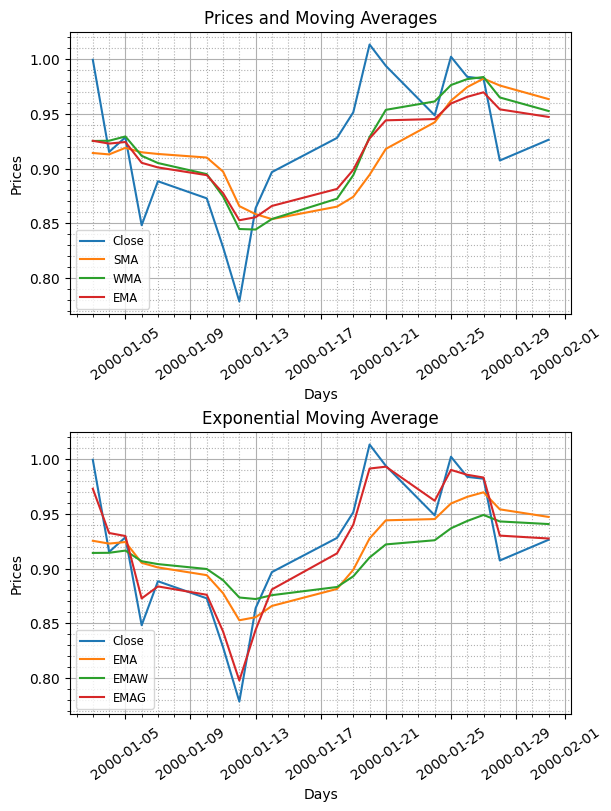

In [ ]:
plt.figure(figsize=(6, 8), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
PlotData(D, C, day1, day2, 'Close')
PlotData(D, SMA, day1, day2, 'SMA')
PlotData(D, WMA, day1, day2, 'WMA')
PlotData(D, EMA, day1, day2, 'EMA')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Prices and Moving Averages')
# Second subplot
plt.subplot(2, 1, 2)
PlotData(D, C, day1, day2, 'Close')
PlotData(D, EMA, day1, day2, 'EMA')
PlotData(D, EMAW, day1, day2, 'EMAW')
PlotData(D, EMAG, day1, day2, 'EMAG')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Exponential Moving Average')
#
plt.show()